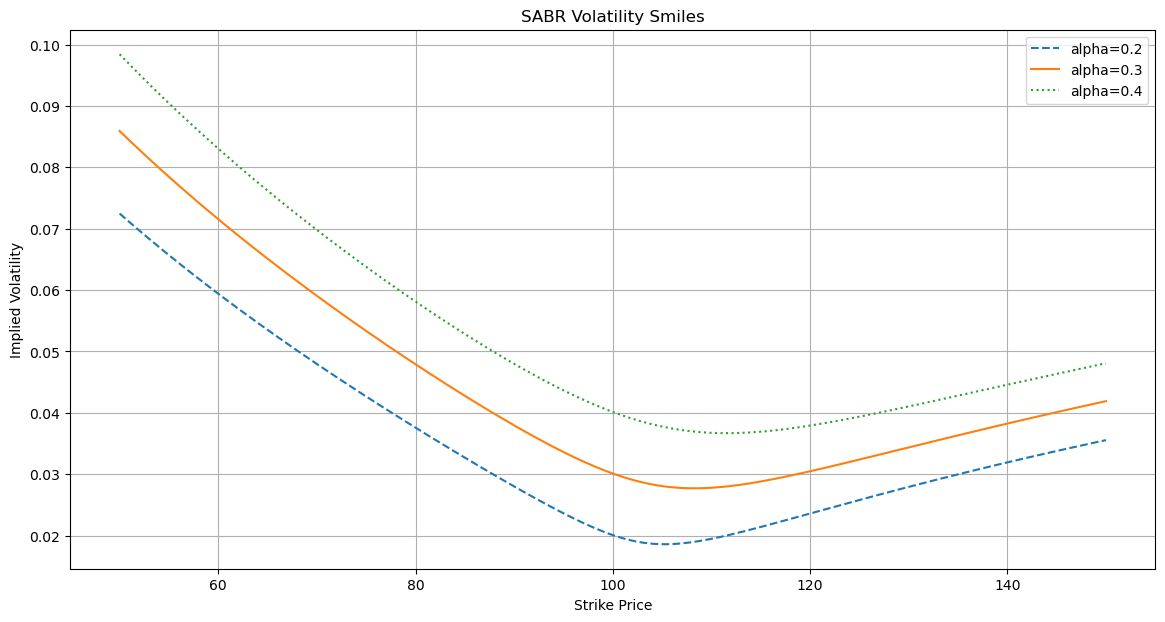

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sabr_volatility(F, K, T, alpha, beta, rho, nu):
    """
    Calculate the SABR model implied volatility.
    """
    if F == K:
        fk_beta = F**(1-beta)
        vol = (alpha / fk_beta) * (1 + ((1-beta)**2 * alpha**2 / (24 * fk_beta**2) + 
              rho * beta * nu * alpha / (4 * fk_beta) + (2 - 3 * rho**2) * nu**2 / 24) * T)
    else:
        fk_beta = F**(1-beta) * K**(1-beta)
        z = nu / alpha * np.log(F / K) * fk_beta**0.5
        x_z = np.log((np.sqrt(1 - 2 * rho * z + z**2) + z - rho) / (1 - rho))
        vol = (alpha / fk_beta**0.5 * z / x_z) * (1 + ((1-beta)**2 * alpha**2 / (24 * fk_beta) +
              rho * beta * nu * alpha / (4 * fk_beta**0.5) + (2 - 3 * rho**2) * nu**2 / 24) * T)
    return vol

def plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes):
    """
    Generate volatility smile plots for different SABR parameters.
    """
    plt.figure(figsize=(14, 7))
    line_styles = ['--', '-', ':']
    
    for a, ls in zip(alpha, line_styles):
        vols = [sabr_volatility(F, k, T, a, beta, rho, nu) for k in strikes]
        plt.plot(strikes, vols, linestyle=ls, label=f'alpha={a}')
    
    plt.title('SABR Volatility Smiles')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define parameters
F = 100  # Forward rate
T = 1    # Time to maturity
alpha = [0.2, 0.3, 0.4]  # Different levels of alpha for comparison
beta = 0.5
rho = -0.4
nu = 0.25
strikes = np.linspace(50, 150, 200)  # Increased number of strike points for smoother plot

plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes)
